<a href="https://colab.research.google.com/github/AkshaySaini25/Play-Store-App-Review-Analysis/blob/main/Akshay_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from datetime import timedelta

In [ ]:
data=pd.read_csv('C:/Users/ak663/Desktop/Capstone Project/Play Store Data.csv')

In [ ]:
data[data['Installs']=='Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
data.drop(10472,inplace =True)

In [ ]:
data[data['Type']=='Paid']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_int,Reviews_int,Price_int,Size_int
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,100000.0,11442.0,4.99,6.80
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,100000.0,10295.0,4.99,39.00
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,100000.0,11442.0,4.99,6.80
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,100000.0,10295.0,4.99,39.00
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,100000.0,18247.0,3.99,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10735,FP VoiceBot,FAMILY,NaN,17,157k,100+,Paid,$0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up,100.0,17.0,0.99,0.15
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,"1,000+",Paid,$7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up,1000.0,35.0,7.99,2.40
10782,Trine 2: Complete Story,GAME,3.8,252,11M,"10,000+",Paid,$16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up,10000.0,252.0,16.99,11.00
10785,"sugar, sugar",FAMILY,4.2,1405,9.5M,"10,000+",Paid,$1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up,10000.0,1405.0,1.20,9.50


# Function for the info of data

In [ ]:
def printinfo():
    temp = pd.DataFrame(index=data.columns)
    temp['data_type'] = data.dtypes
    temp['null_count'] = data.isnull().sum()
    temp['unique_count'] = data.nunique()
    return temp


# Install(String to Integer)


In [ ]:
#install String to Integer
def installs_int(install): 
            if((type(install)==str) and (install[-1]=='+')):
                install=install[:len(install)-1]
                install=[i for i in install if i!=',']
                install="".join(install)
                return float(install)
            else:
                return float(install)
data['Installs_int']=data['Installs'].map(installs_int)

# Price(String to Integer) 

In [ ]:
#price String to Integer
def price_int(price): 
            if((type(price)==str) and (price[0]=='$')):
                price=price[1:]
                return float(price)
            else:
                return float(price)
#         except:
#             if(type(review)==str):
#                 return 0
data['Price_int']=data['Price'].map(price_int)

# Reviews(String to Integer)

In [ ]:
#reviews String to Integer
def reviews_int(review): 
            if(type(review)==str):
               
                return float(review)
            else:
                return float(review)
#         except:
#             if(type(review)==str):
#                 return 0
data['Reviews_int']=data['Reviews'].map(reviews_int)

# Size(String to Integer) 

In [ ]:
#size String to Integer
def size_int(size): 
            if((type(size)==str) & (size[-1]=='M')):
                size=size[:len(size)-1]
                return float(size)
            elif((type(size)==str) & (size[-1]=='k')):
                size=size[:len(size)-1]
                return round(float(size) /1024,2)
            else:
                return 0
data['Size_int']=data['Size'].map(size_int)

# Converting Date And Time


In [ ]:
data['Rating'].fillna(data['Rating'].mean(),inplace = True)


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
 13  Installs_int    10829 non-null  float64
 14  Reviews_int     10829 non-null  float64
 15  Price_int       10829 non-null  float64
 16  Size_int        10829 non-null  float64
dtypes: float64(5), object(12)
memor

In [ ]:
printinfo()

,data_type,null_count,unique_count
App,object,0,9648
Category,object,0,33
Rating,float64,0,40
Reviews,object,0,5999
Size,object,0,457
Installs,object,0,20
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


# Storing clean data into new dataframe

In [ ]:
cdata=data[['App', 'Category', 'Rating', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Installs_int', 'Price_int', 'Reviews_int', 'Size_int','R_M_Install']]

In [ ]:
data['R_M_Install']=data['Rating']*data['Installs_int']

In [ ]:
cdata.head()

,App,Category,Rating,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_int,Price_int,Reviews_int,Size_int,R_M_Install
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,Free,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000.0,0.0,159.0,19.0,41000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,Free,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000.0,0.0,967.0,14.0,1950000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,Free,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000.0,0.0,87510.0,8.7,23500000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,Free,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000.0,0.0,215644.0,25.0,225000000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,Free,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000.0,0.0,967.0,2.8,430000.0


In [ ]:
a=cdata['R_M_Install'].max()

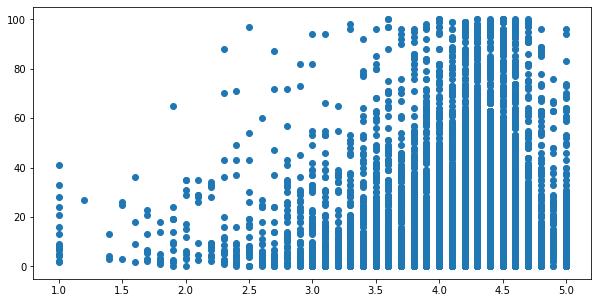

In [ ]:
d1=data.groupby('Rating').agg({'Size_int':'mean'})
plt.scatter(data['Rating'],data["Size_int"])
plt.rcprams=(1,61)
plt.show()

<AxesSubplot:xlabel='Category'>

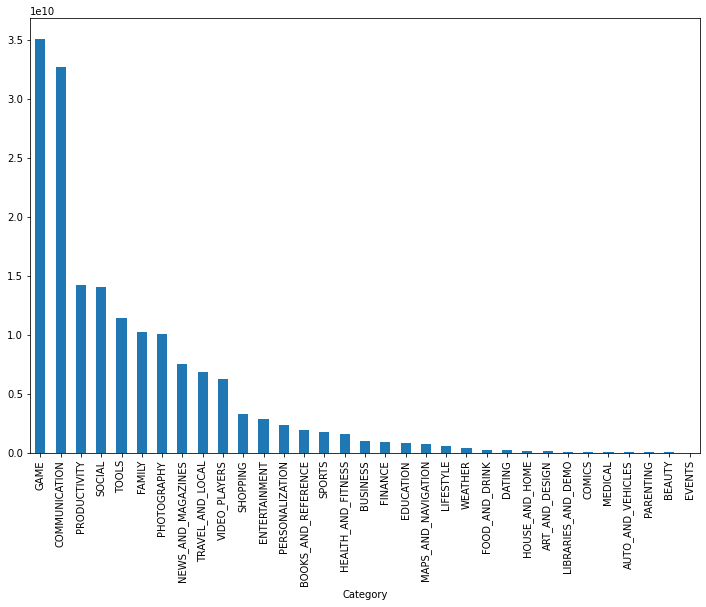

In [ ]:
a=cdata.groupby('Category')['Installs_int'].sum().sort_values(ascending=False)
a.plot(figsize=(12,8),kind='bar')

<AxesSubplot:xlabel='Category'>

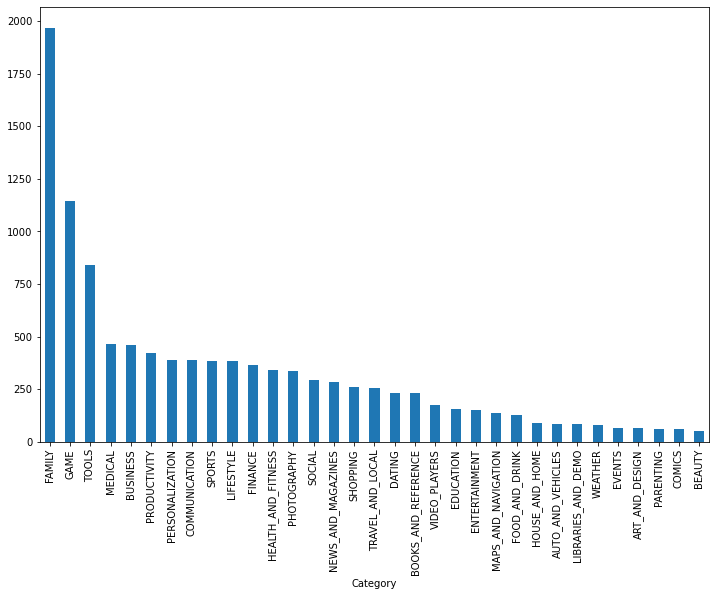

In [ ]:
cri=cdata.groupby('Category')['App'].count().sort_values(ascending=False)
cri.plot(figsize=(12,8),kind='bar')

<AxesSubplot:xlabel='Category'>

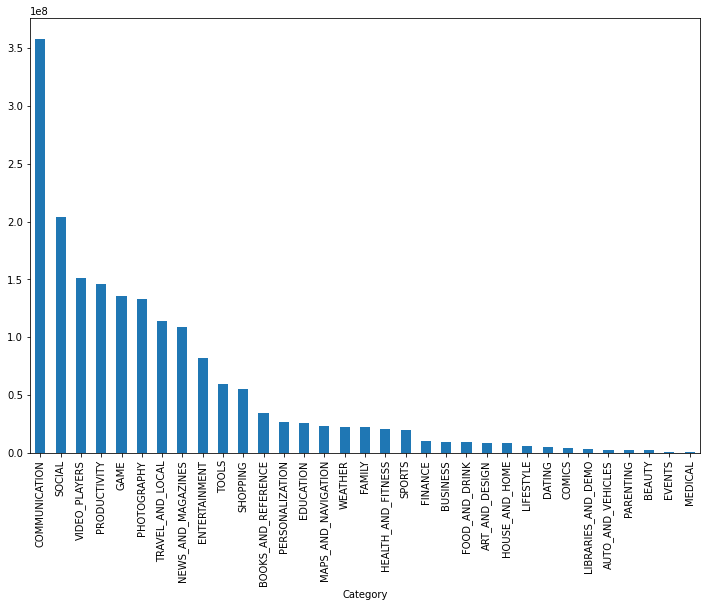

In [ ]:
b=cdata.groupby('Category')['R_M_Install'].mean().sort_values(ascending=False)
b.plot(figsize=(12,8),kind='bar')